# Online Retail Store

#### Data Set Information:
This Online Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2010 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.



#### Attribute Information:
- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.





#### Source:
Dr. Daqing Chen, Course Director: MSc Data Science. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

# Loading the dataset

In [1]:
import pandas as pd

In [2]:
# Load the CSV file into a pandas dataframe
df = pd.read_excel('Online Retail Data Set.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Check the dimension of the dataframe
df.shape

(541909, 8)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
#Checking the datatypes
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
#Description of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Check for missing values in the dataframe
missing_values = df.isnull()

# Count the number of missing values for each column
num_missing = missing_values.sum()

# Print the number of missing values for each column
print(num_missing)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# Drop rows with missing values for the 'Description' column 
df.dropna(subset=['Description'],inplace= True)

In [9]:
# Fill in missing values for the 'CustomerID' column with a default value= "Guest"
df['CustomerID'] = df['CustomerID'].fillna('Guest')

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
# Let's check the datatypes again after replacting te missing values in 'ÇustomerID' column
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

- The 'CustomerID' datatypes changed from float64 to Object and we do not need to perform any mathematical operation on this column so it is an acceptable alteration

#### Handling the Negative 'Quantity' values:

In [12]:
# As I was going through the Excel sheet of the current dataset, I have found that it has some negative values in the Quantity column which is not valid
num_negatives = (df['Quantity'] < 0).sum()
print("Number of negative values in Quantity column:", num_negatives)

Number of negative values in Quantity column: 9762


#### We can handle these negative quantity values in the following ways:
- Excluding the negative values (which will a loss of a big chunk of data)
- Treating the negative values as positive (which is not a very reasonable solution because the results insights it will give would be very different from the actual data)
- Creating a new variable as 'Returned' which will return Yes for the returned values and No otherwise; and after that we can replace the negative values as 0 as it can not be considered as actual orders. (I think this will be the best way to handle this anomaly)

In [13]:
# Create Returned column
import numpy as np
df['Returned'] = np.where(df['Quantity']< 0, 'Yes', 'No')


In [14]:
# Replace the negative values in the 'Quantity' column with 0 
df['Quantity'] = df['Quantity'].where(df['Quantity'] >= 0, 0)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Returned
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,No
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No


In [16]:
# Check for the negative values in the 'Quantity' column after the above changes
num_negatives = (df['Quantity'] < 0).sum()
print("Number of negative values in Quantity column:", num_negatives)

Number of negative values in Quantity column: 0


#### Handling the cancelled orders:
 According to the attribute information given above, the 'InvoiveNo' starting with 'C' are the cancelled orders. And we need to replace the 'Quantity' as 0 for those records as well.

In [17]:
# Replace the 'Returned' column by 'Returned/Cancelled' putting 'Yes' for Returned/Cancelled orders and 'No' for actual orders in this new column
df=df.drop('Returned', axis=1)

import numpy as np
df['Returned/Cancelled'] = np.where(df['Quantity']< 0 | df['InvoiceNo'].str.startswith('C'), 'Yes', 'No')


In [18]:
# Replace 'Quantity' column with 0 if there is negative values in the 'Quantity' column or if the InvoiceNo starts with 'C'
df['Quantity'] = np.where(df['Quantity'] < 0 | (df['InvoiceNo'].str.startswith('C')), 0, df['Quantity'])

In [19]:
df.head(159)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Returned/Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,No
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
...,...,...,...,...,...,...,...,...,...
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Yes
155,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074.0,United Kingdom,No
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074.0,United Kingdom,No
157,536384,22464,HANGING METAL HEART LANTERN,12,2010-12-01 09:53:00,1.65,18074.0,United Kingdom,No


# Handling the outliers

We still have outliers in the 'Quantity' and 'UnitPrice' columns and we need to handle the outliers in order to get accurate results.

In [20]:
df.describe()

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,10.414251,4.623519
std,155.223190,96.889628
min,0.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### Quantity column

<AxesSubplot:>

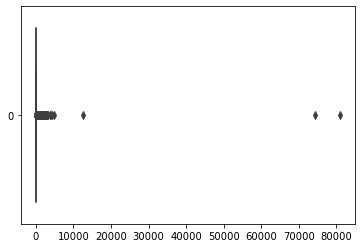

In [21]:
import seaborn as sns
sns.boxplot(data=df['Quantity'], orient='h')

As you can see, there are 3 big outliers present in the 'Quantity' column. So, we must remove them in order to get better insights on our dataset

In [22]:
## Let's define an outlier detector function
def max_value(dataset):
    data= sorted(dataset)
    maxim=np.percentile(data, [100])
    inplace=True
    return float(maxim)    

<AxesSubplot:>

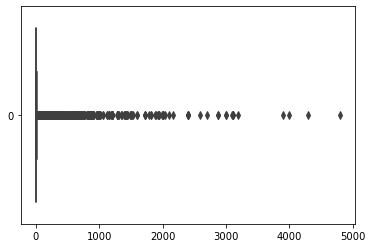

In [23]:
# Removing the 3 extreme values
for i in range(0,3):
    df=df[df['Quantity']!=max_value(df['Quantity'])]
     
sns.boxplot(data=df['Quantity'], orient='h')

In [24]:
print(max_value(df['Quantity']))

4800.0


## UnitPrice Column

<AxesSubplot:>

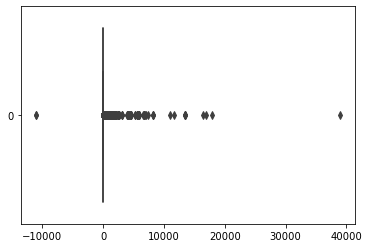

In [25]:
sns.boxplot(data=df['UnitPrice'], orient='h')

It has negative values which are invalid and 1 big outlier, which needs to be removed

<AxesSubplot:>

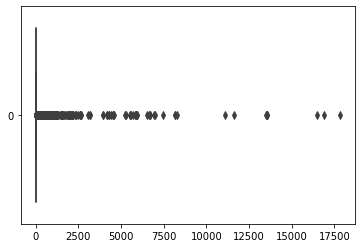

In [26]:
df=df[df['UnitPrice']>=0]
df=df[df['UnitPrice']!=max_value(df['UnitPrice'])]
sns.boxplot(data=df['UnitPrice'], orient='h')

# SQL Operations on the dataset

We are done with the data cleaning part. Now let's write some SQL queries to get insights on this dataset

In [27]:
import sqlite3

In [28]:
conn = sqlite3.connect('Online_retail.db')

In [29]:
df.to_sql('Retail', conn, if_exists='replace', index=False)

540449

In [30]:
#Viewing the created table
query = 'Select * from Retail'
pd.read_sql_query(query, conn)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Returned/Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,No
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,No
...,...,...,...,...,...,...,...,...,...
540444,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,No
540445,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,No
540446,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,No
540447,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,No


 ### 1. Which country is generating the highest revenue, and which country is generating the lowest?

In [31]:
query= '''With cte as 
            (Select Country, sum(Quantity*UnitPrice) as Revenue 
            From Retail
            Group by country)
          Select Country, Revenue 
          from cte 
          where revenue = (select min(revenue) from cte)
          Union 
          Select Country, Revenue
          from cte
          where revenue = (select max(revenue) from cte)
          order by revenue desc'''
pd.read_sql_query(query, conn)

,Country,Revenue
0,United Kingdom,8.779569e+06
1,Saudi Arabia,1.459200e+02


#### Result:
###### Highest Revenue Generating Country:
United Kingdom (£8779569)
###### Lowest Revenue Generating Country:
Saudi Arabia (£145.92)


### 2. What is the monthly trend of revenue, which months have faced the biggest increase/decrease?

In [32]:
# Monthly trend of the revenue
query= ''' Select Sum(Quantity * UnitPrice) As Monthly_revenue, strftime("%m", date(invoicedate))As Month, strftime("%Y", date(invoicedate))As Year
           From Retail
           Group By Year, Month
                     '''
pd.read_sql_query(query, conn)

,Monthly_revenue,Month,Year
0,823746.140,12,2010
1,614180.960,01,2011
2,523631.890,02,2011
3,717639.360,03,2011
4,537808.621,04,2011
5,770536.020,05,2011
6,761739.900,06,2011
7,719221.191,07,2011
8,759138.380,08,2011
9,1058590.172,09,2011


In [33]:
# Using Lag() function to get the previous month's revenue
query= '''With cte as
            (Select Sum(Quantity * UnitPrice) As Monthly_revenue, strftime("%m", date(invoicedate))As Month, strftime("%Y", date(invoicedate))As Year
            From Retail
            Group By Year, Month)
            
            Select Monthly_revenue, Month, Year, Lag(Monthly_revenue) Over (Order By Year, Month) As NextMonthRevenue
            From cte'''
pd.read_sql_query(query, conn)

,Monthly_revenue,Month,Year,NextMonthRevenue
0,823746.140,12,2010,NaN
1,614180.960,01,2011,823746.140
2,523631.890,02,2011,614180.960
3,717639.360,03,2011,523631.890
4,537808.621,04,2011,717639.360
5,770536.020,05,2011,537808.621
6,761739.900,06,2011,770536.020
7,719221.191,07,2011,761739.900
8,759138.380,08,2011,719221.191
9,1058590.172,09,2011,759138.380


In [34]:
# Differnce in the monthly revenues generated
query= '''With cte as
            (Select Sum(Quantity * UnitPrice) As Monthly_revenue, strftime("%m", date(invoicedate))As Month, strftime("%Y", date(invoicedate))As Year
            From Retail
            Group By Year, Month)
                          
            Select Monthly_revenue,
                   Month, 
                   Year, 
                   Lag(Monthly_revenue) Over (Order By Year, Month) As NextMonthRevenue,
                   Monthly_revenue - Lag(Monthly_revenue) Over (Order By Year, Month) As Difference
            From cte'''
pd.read_sql_query(query, conn)

,Monthly_revenue,Month,Year,NextMonthRevenue,Difference
0,823746.140,12,2010,NaN,NaN
1,614180.960,01,2011,823746.140,-209565.180
2,523631.890,02,2011,614180.960,-90549.070
3,717639.360,03,2011,523631.890,194007.470
4,537808.621,04,2011,717639.360,-179830.739
5,770536.020,05,2011,537808.621,232727.399
6,761739.900,06,2011,770536.020,-8796.120
7,719221.191,07,2011,761739.900,-42518.709
8,759138.380,08,2011,719221.191,39917.189
9,1058590.172,09,2011,759138.380,299451.792


Here negative difference value indicate decrease and positive values indicate the increase in the revenue generated.

In [35]:
# Months which faced the biggest increase/decrease
query= '''With cte as
            (Select Sum(Quantity * UnitPrice) As Monthly_revenue, strftime("%m", date(invoicedate))As Month, strftime("%Y", date(invoicedate))As Year
            From Retail
            Group By Year, Month),
                cte2 as
            (Select Monthly_revenue, Month, Year, 
                   Lag(Monthly_revenue) Over (Order By Year, Month) As NextMonthRevenue,
                   Monthly_revenue - Lag(Monthly_revenue) Over (Order By Year, Month) As Difference
            From cte)
          Select Month, Year, Difference 
          from cte2 
          where Difference = (select min(Difference) from cte2)
          Union 
          Select Month, Year, Difference
          from cte2
          where Difference = (select max(Difference) from cte2)
            '''
pd.read_sql_query(query, conn)

,Month,Year,Difference
0,11,2011,354517.03
1,12,2011,-1039173.25


#### Results:
###### Month having biggest increase in sales:
November, 2011 
###### Month having biggest decrease in sales:
December, 2011

### 3. Which months generated the most revenue? Is there a seasonality in sales?

In [36]:
# Month having highest revenue generated
query = '''
           Select Month, Year, Max(Monthly_revenue)
           From (Select Sum(Quantity * UnitPrice) As Monthly_revenue, strftime("%m", date(invoicedate))As Month, strftime("%Y", date(invoicedate))As Year
                 From Retail
                 Group By Year, Month) t'''
pd.read_sql_query(query, conn)

,Month,Year,Max(Monthly_revenue)
0,11,2011,1509496.33


#### Seasonality in sales

    Monthly_revenue    Month
0        823746.140  12/2010
1        614180.960  01/2011
2        523631.890  02/2011
3        717639.360  03/2011
4        537808.621  04/2011
5        770536.020  05/2011
6        761739.900  06/2011
7        719221.191  07/2011
8        759138.380  08/2011
9       1058590.172  09/2011
10      1154979.300  10/2011
11      1509496.330  11/2011
12       470323.080  12/2011


Text(0, 0.5, 'Monthly sale')

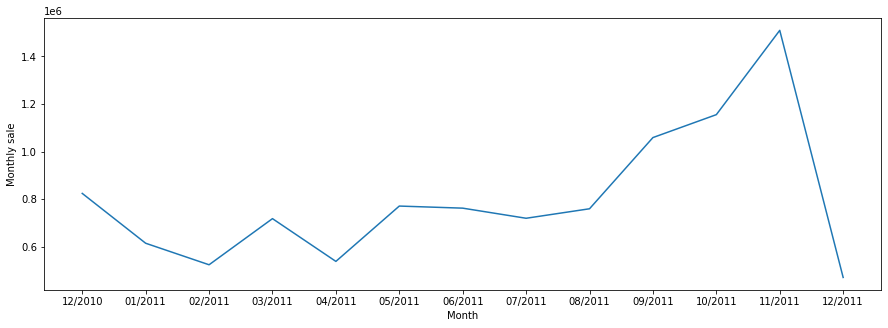

In [37]:
query= ''' Select Sum(Quantity * UnitPrice) As Monthly_revenue, strftime("%m", date(invoicedate)) || '/' || strftime("%Y", date(invoicedate)) as Month
           From Retail
           Group By strftime("%Y", date(invoicedate)), strftime("%m", date(invoicedate))
                     '''
monthly_sales=pd.read_sql_query(query, conn)
print(monthly_sales)

#Plotting Monthly Sales
import matplotlib.pyplot as plt
%matplotlib inline
x=monthly_sales['Month']
y=monthly_sales['Monthly_revenue']

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
  
plt.plot(x, y)
plt.xlabel("Month")
plt.ylabel("Monthly sale")

#### Results:
- November, 2011 generated maximum monthly revenue of £1509496.33
- The sales are more in the months Sept- Nov and falls down in the months Feb-Aug. And shows the biggest decrease in the month of December

### 4. Who are the top customers and how much do they contribute to the total revenue? Is the business dependent on these customers or is the customer base diversified?

In [38]:
# Top 10 customers, amount spent by them and their contribution to the total revenue
query = '''select CustomerID, sum(Quantity*UnitPrice) As Amount_spent ,  (sum(Quantity*UnitPrice) )*100/Total_revenue as Contribution_in_Total_revenue
           From (select *, sum(Quantity*UnitPrice) Over () as Total_revenue
                From Retail)
           Group by CustomerID 
           Order by Amount_spent Desc 
           Limit 10'''
pd.read_sql_query(query, conn)



,CustomerID,Amount_spent,Contribution_in_Total_revenue
0,Guest,1.755277e+06,16.843598
1,14646.0,2.802060e+05,2.688851
2,18102.0,2.596573e+05,2.491666
3,17450.0,1.945508e+05,1.866905
4,14911.0,1.438251e+05,1.380142
5,12415.0,1.249145e+05,1.198677
6,14156.0,1.173796e+05,1.126372
7,17511.0,9.106238e+04,0.873833
8,16029.0,8.102484e+04,0.777513
9,16684.0,6.665356e+04,0.639606


In [39]:
top_customers=pd.read_sql_query(query, conn)
top_customers['Contribution_in_Total_revenue'].sum()

29.887164208475646

#### Results:
The top 10 customers contribute to only 29.8872% of the total revenue generated.

Text(0.5, 1.0, 'Distribution of revenue contribution by customers')

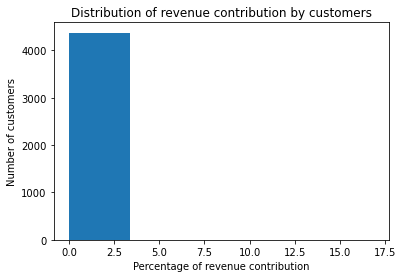

In [40]:
query = '''select CustomerID, sum(Quantity*UnitPrice) As Amount_spent ,  (sum(Quantity*UnitPrice) )*100/Total_revenue as Contribution_in_Total_revenue
           From (select *, sum(Quantity*UnitPrice) Over () as Total_revenue
                From Retail)
           Group by CustomerID 
           Order by Amount_spent Desc 
          '''
contibution_ofeach_customer=pd.read_sql_query(query, conn)

plt.hist(contibution_ofeach_customer['Contribution_in_Total_revenue'], bins=5)
plt.xlabel('Percentage of revenue contribution')
plt.ylabel('Number of customers')
plt.title('Distribution of revenue contribution by customers')

Maximum number of customers have around 0-3 % contribution in the total revenue so the customer base is well diversified

### 5. What is the percentage of customers who are repeating their orders? Are they ordering the same products or different?

In [41]:
# Orders placed by the customer
query = '''select CustomerID, InvoiceNo, Invoicedate
           From Retail
           group by InvoiceNo, CustomerID 
           '''
pd.read_sql_query(query, conn)

,CustomerID,InvoiceNo,InvoiceDate
0,17850.0,536365,2010-12-01 08:26:00
1,17850.0,536366,2010-12-01 08:28:00
2,13047.0,536367,2010-12-01 08:34:00
3,13047.0,536368,2010-12-01 08:34:00
4,13047.0,536369,2010-12-01 08:35:00
...,...,...,...
24435,16446.0,C581484,2011-12-09 09:27:00
24436,14397.0,C581490,2011-12-09 09:57:00
24437,15498.0,C581499,2011-12-09 10:28:00
24438,15311.0,C581568,2011-12-09 11:57:00


If a customer orders more than once, a new InvoiceNo is assigned to him. So we can count the number of invoices for each customers and check if they have repeated orders or not.

In [42]:
# Number of orders placed by each customer
query = '''select CustomerID, count(InvoiceNo) as Number_of_orders
           From (select CustomerID, InvoiceNo, Invoicedate
                 From Retail
                 Group by CustomerID,InvoiceNo)
           Group by CustomerID
           '''
pd.read_sql_query(query, conn)

,CustomerID,Number_of_orders
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18281.0,1
4368,18282.0,3
4369,18283.0,16
4370,18287.0,3


In [43]:
# Percentage of Customers who are repeating their orders
query = '''with cte as 
          (select CustomerID, count(InvoiceNo) as Number_of_orders, count(*) Over () as Total_customers
           From (select CustomerID, InvoiceNo, Invoicedate
                 From Retail
                 Group by CustomerID,InvoiceNo)
           Group by CustomerID)
           
           select count(CustomerID) as NumberofRepeatingcustomers, count(CustomerID)*100/Total_customers as Percentage
           From cte
           Where Number_of_orders>1
           '''
pd.read_sql_query(query, conn)

,NumberofRepeatingcustomers,Percentage
0,3059,69


There are 3059 Customers (69% of the total) who are repeating their orders.